In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [60]:
df=pd.read_csv('dataset.csv')

In [62]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data cleaning

In [64]:
df['Production (Tons)']=df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace(".","").str.replace(",","")
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")

In [66]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [68]:
df.rename(columns={"Production (Tons)":"Production(Tons)" },inplace=True)
df.rename(columns={"Production per Person (Kg)":"ProductionperPerson(Kg)" },inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)" },inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)" },inplace=True)

In [70]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [72]:
df.isnull().sum()

Unnamed: 0                 0
Country                    0
Continent                  0
Production(Tons)           0
ProductionperPerson(Kg)    0
Acreage(Hectare)           1
Yield(Kg/Hectare)          1
dtype: int64

In [74]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [84]:
df=df.dropna().reset_index()

In [86]:
df.isnull().sum()

index                      0
Unnamed: 0                 0
Country                    0
Continent                  0
Production(Tons)           0
ProductionperPerson(Kg)    0
Acreage(Hectare)           0
Yield(Kg/Hectare)          0
dtype: int64

In [88]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [90]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [92]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [96]:
df.dtypes

Country                    object
Continent                  object
Production(Tons)           object
ProductionperPerson(Kg)    object
Acreage(Hectare)           object
Yield(Kg/Hectare)          object
dtype: object

In [98]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['ProductionperPerson(Kg)']=df['ProductionperPerson(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)

In [100]:
df.dtypes

Country                     object
Continent                   object
Production(Tons)           float64
ProductionperPerson(Kg)    float64
Acreage(Hectare)           float64
Yield(Kg/Hectare)          float64
dtype: object

In [102]:
df.nunique()

Country                    102
Continent                    6
Production(Tons)           102
ProductionperPerson(Kg)    101
Acreage(Hectare)           101
Yield(Kg/Hectare)          102
dtype: int64

## Univariate anaylsis

In [105]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## How many Countries produce Sugarcane from each continent??

In [110]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

## Distribution of columns 

<Axes: xlabel='Continent'>

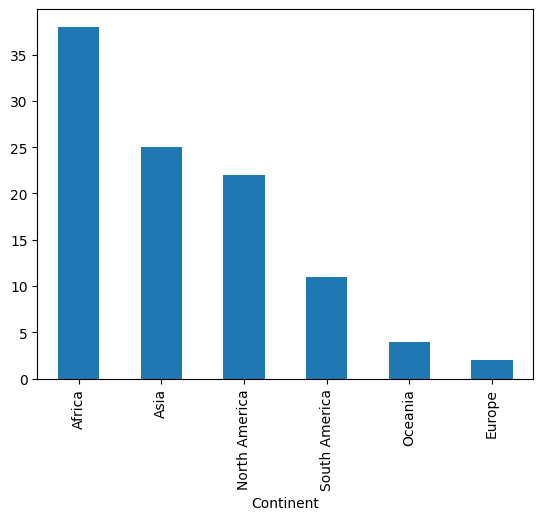

In [112]:
df['Continent'].value_counts().plot(kind="bar")

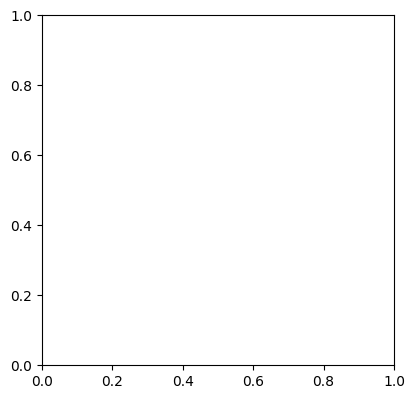

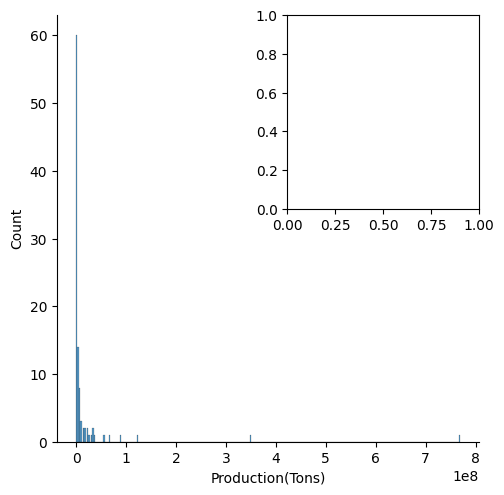

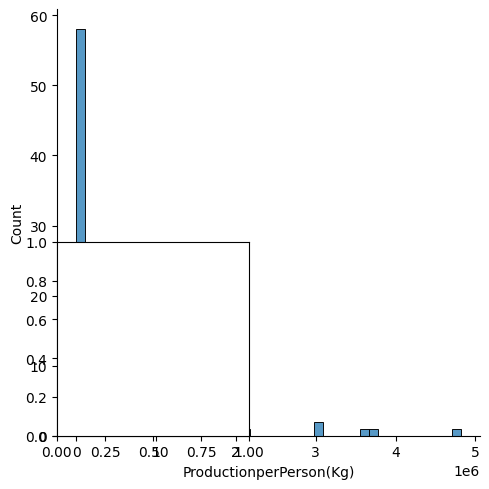

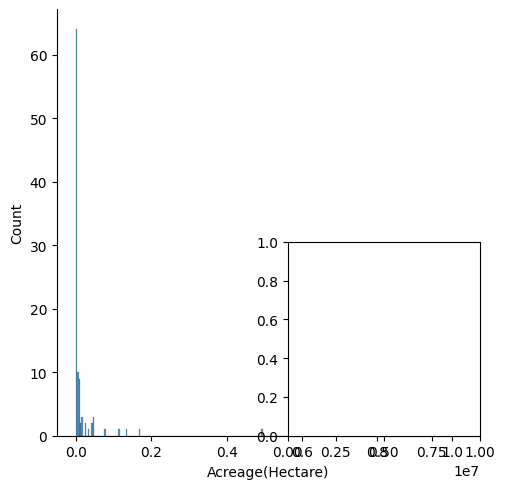

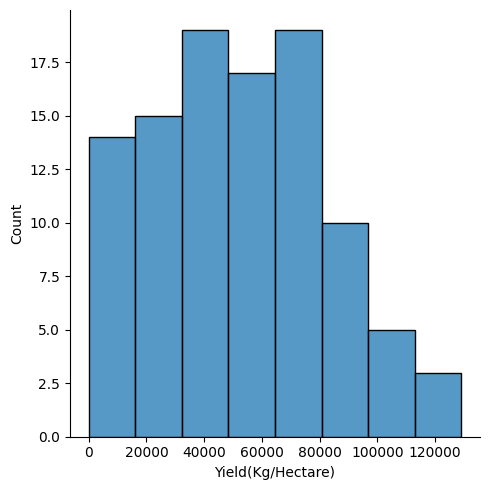

In [115]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.displot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.displot(df['ProductionperPerson(Kg)'])
plt.subplot(2,2,3)
sns.displot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.displot(df['Yield(Kg/Hectare)'])

## Checking Outliers

<Axes: ylabel='Yield(Kg/Hectare)'>

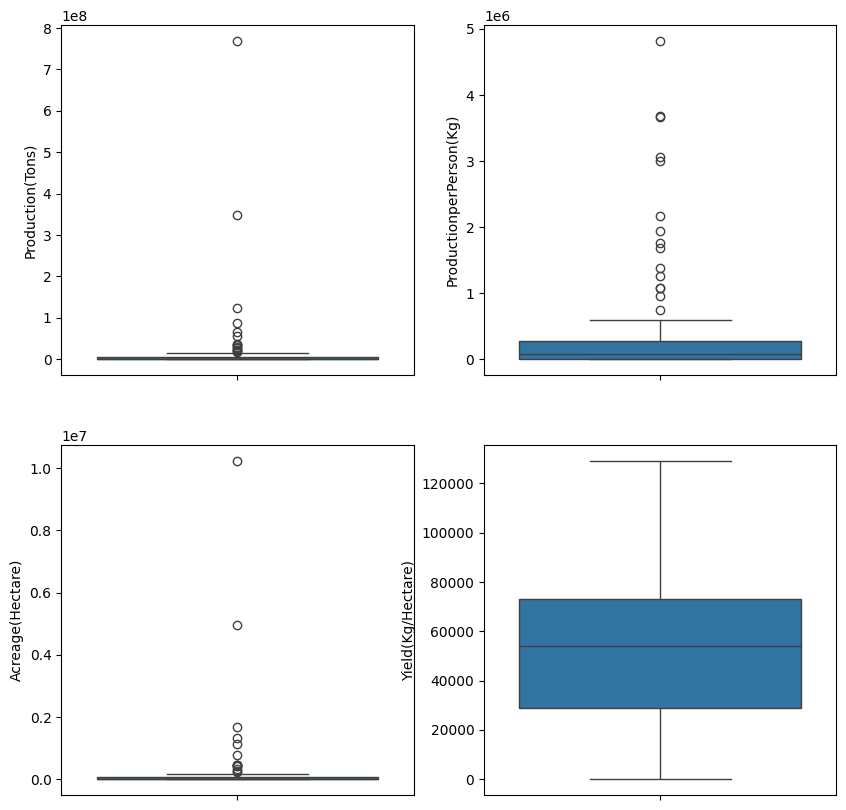

In [119]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['ProductionperPerson(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

In [125]:
df.describe()

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,102.000000
mean,1.850372e+07,4.124805e+05,2.498981e+05,52628.078431
std,8.419149e+07,8.669140e+05,1.137003e+06,30504.676683
min,1.000000e+00,0.000000e+00,0.000000e+00,10.000000
25%,6.251875e+04,1.075225e+04,1.104000e+03,29072.025000
50%,1.440044e+06,8.135850e+04,1.655800e+04,54108.950000
75%,6.426824e+06,2.828128e+05,8.047400e+04,73282.700000
max,7.686784e+08,4.816299e+06,1.022620e+07,129049.300000


## Bivariate anaylsis

In [130]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## Which country produces maximum sugarcane??

In [137]:
df_new =df[["Country","Production(Tons)"]].set_index("Country")

In [141]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [145]:
df_new['Production(Tons)_%']=df_new['Production(Tons)']*100/(df_new['Production(Tons)'].sum())

In [149]:
df_new

,Production(Tons),Production(Tons)_%
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_%'>

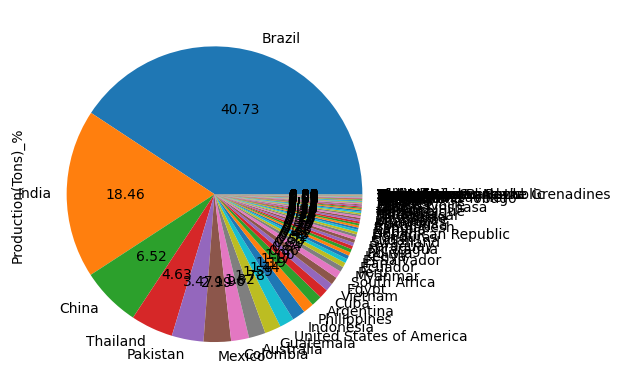

In [153]:
df_new['Production(Tons)_%'].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

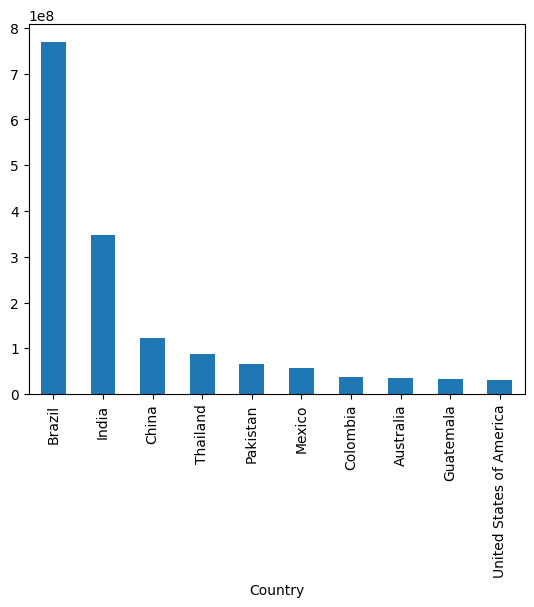

In [157]:
df_new['Production(Tons)'].head(10).plot(kind="bar")

C:\Users\Yash\AppData\Local\Temp\ipykernel_1972\3578709949.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


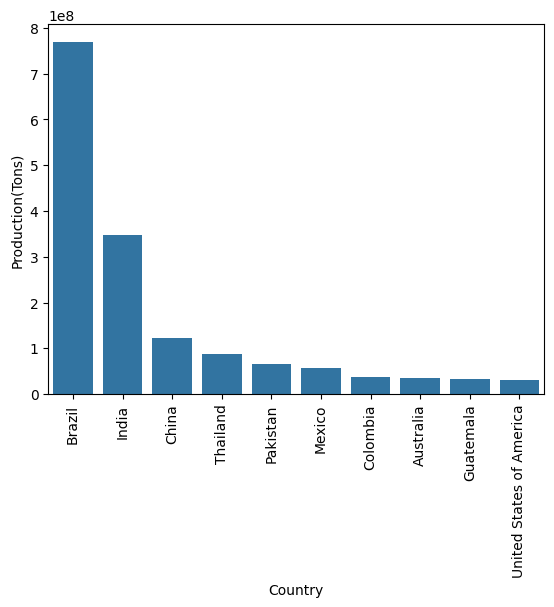

In [179]:
ax=sns.barplot(data=df.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which Country Has highest land??

C:\Users\Yash\AppData\Local\Temp\ipykernel_1972\2097634904.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


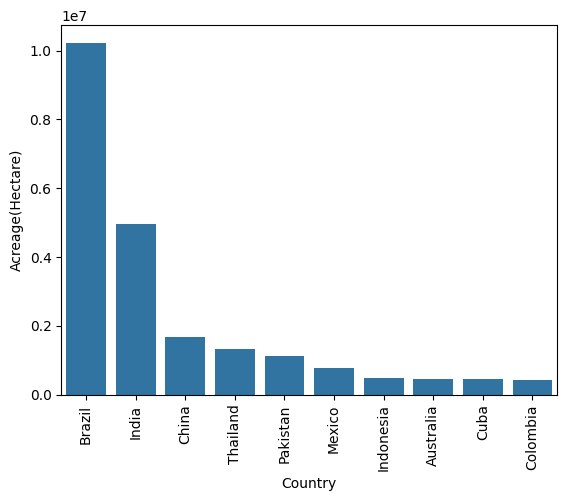

In [184]:
df_acr=df.sort_values("Acreage(Hectare)",ascending=False)
ax=sns.barplot(data=df_acr.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## WHich country has highest yield per hectare

C:\Users\Yash\AppData\Local\Temp\ipykernel_1972\1009550514.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


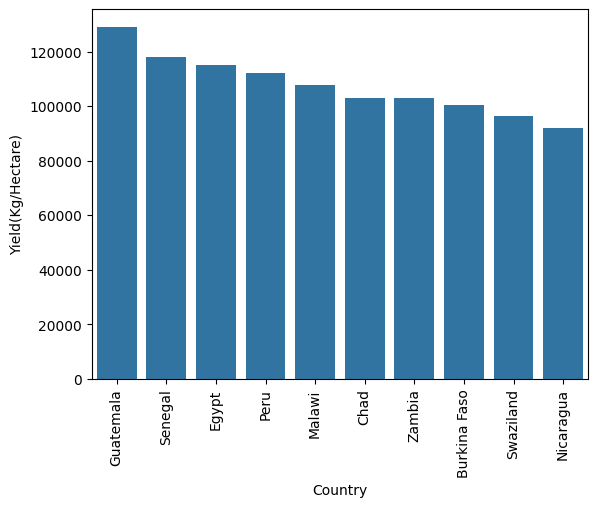

In [189]:
df_yield=df.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which COuntry has highest production??

C:\Users\Yash\AppData\Local\Temp\ipykernel_1972\3908552689.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


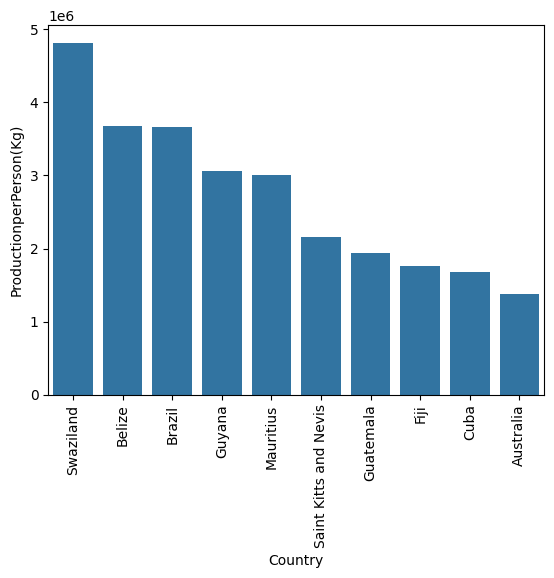

In [192]:
df_yield=df.sort_values("ProductionperPerson(Kg)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country",y="ProductionperPerson(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Correlation

In [198]:
df.corr(numeric_only=True)

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),Production(Tons)_%
Production(Tons),1.000000,0.352369,0.997550,0.132812,1.000000
ProductionperPerson(Kg),0.352369,1.000000,0.341974,0.220522,0.352369
Acreage(Hectare),0.997550,0.341974,1.000000,0.113433,0.997550
Yield(Kg/Hectare),0.132812,0.220522,0.113433,1.000000,0.132812
Production(Tons)_%,1.000000,0.352369,0.997550,0.132812,1.000000


## To visulaise the correaltion using Heatmap


<Axes: >

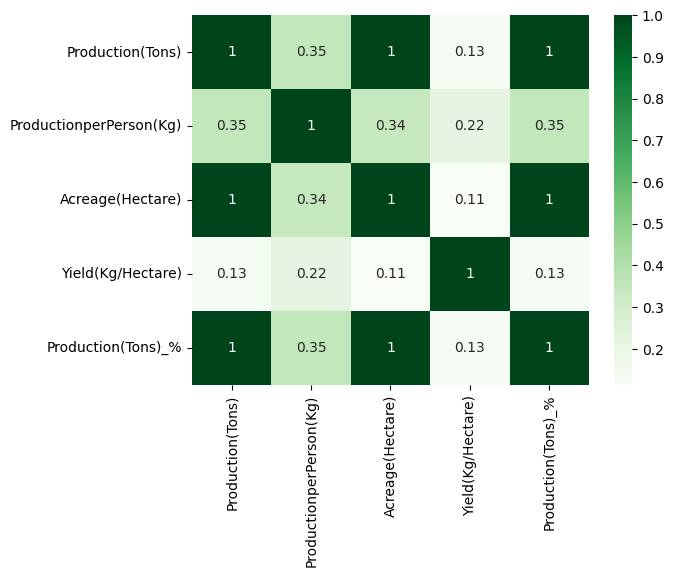

In [218]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Greens")

## Do countries with highest land produce more sugracane??

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

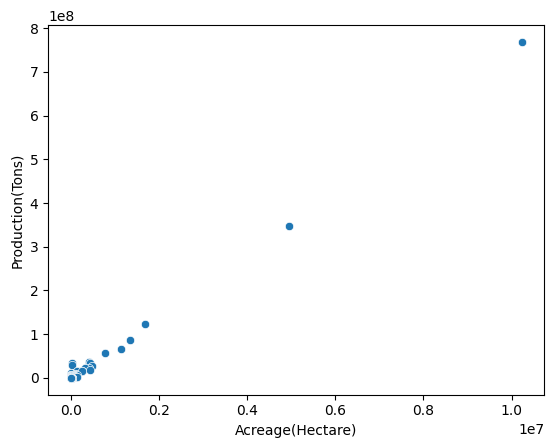

In [220]:
sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")

## Do countries Which yield more sugar cane per hectare produces more sugarcane in total??

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

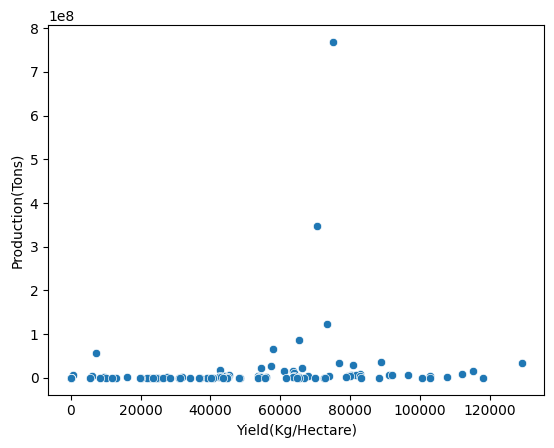

In [225]:
## it does not have corrletaion between yield per hectare and productions tons because they have correlation is 0.13
sns.scatterplot(data=df,x="Yield(Kg/Hectare)",y="Production(Tons)")

## Anaylsis For continent

In [239]:
df_cont=df.groupby("Continent").sum()

In [241]:
df_cont

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),Production(Tons)_%
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,2142107.5,4.751640
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,1171871.4,38.250414
Europe,PortugalSpain,5823.0,536.0,71.0,131870.9,0.000309
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,1082602.4,9.218918
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,162419.1,1.916815
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,677192.7,45.861905


## WHich Continent Produces maximum Sugarcane??

In [259]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

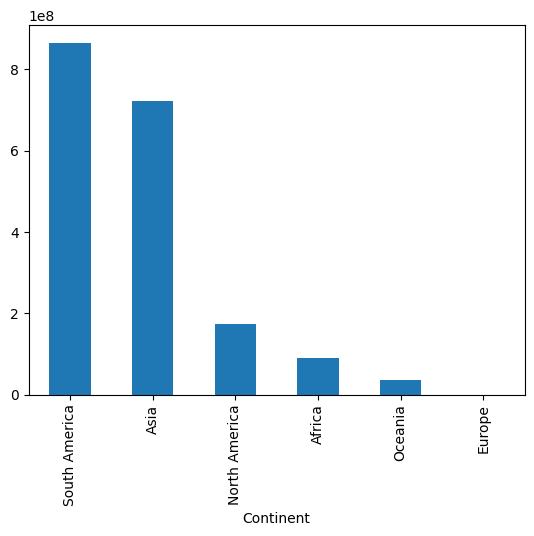

In [251]:
df_cont['Production(Tons)'].sort_values(ascending=False).plot(kind="bar") ## because its have highest land 

<Axes: xlabel='Continent'>

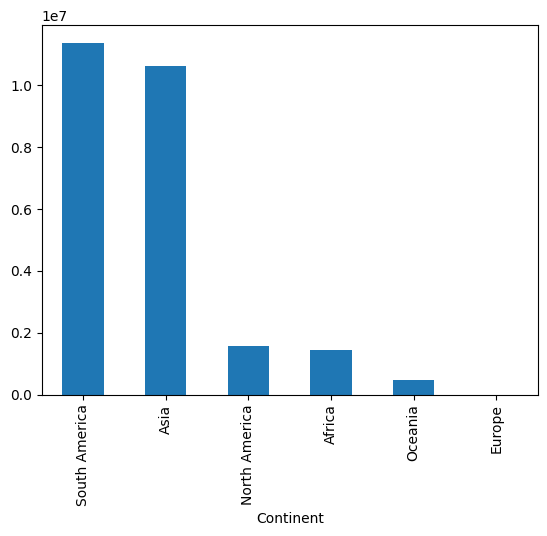

In [245]:
df_cont['Acreage(Hectare)'].sort_values(ascending=False).plot(kind="bar")

## Do number of countries in a continent effects production of sugarcane??

In [274]:
## The answer is no becuase As we seen above that africa have maximum country but highest production have is south america because its have highest land
df_cont["noc"]=df.groupby("Continent").['Country']count()

In [276]:
df_cont

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),Production(Tons)_%,noc
Continent,,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,2142107.5,4.751640,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,1171871.4,38.250414,25
Europe,PortugalSpain,5823.0,536.0,71.0,131870.9,0.000309,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,1082602.4,9.218918,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,162419.1,1.916815,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,677192.7,45.861905,11


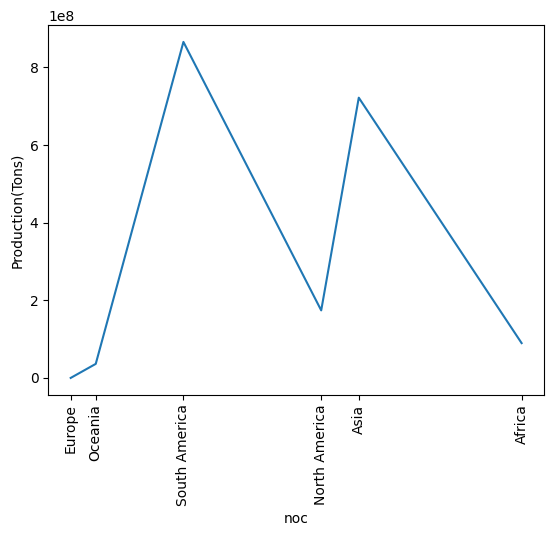

In [288]:
contin_name=df_cont.index.to_list()
#noc =number of country
sns.lineplot(data=df_cont,x="noc",y="Production(Tons)")
plt.xticks(df_cont["noc"],contin_name,rotation=90)
plt.show()

## Correlation by continent

In [286]:
df_cont.corr(numeric_only=True)

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),Production(Tons)_%,noc
Production(Tons),1.000000,0.143100,0.994897,0.091201,1.000000,0.109244
ProductionperPerson(Kg),0.143100,1.000000,0.073059,0.541229,0.143100,0.526387
Acreage(Hectare),0.994897,0.073059,1.000000,0.111166,0.994897,0.132817
Yield(Kg/Hectare),0.091201,0.541229,0.111166,1.000000,0.091201,0.989712
Production(Tons)_%,1.000000,0.143100,0.994897,0.091201,1.000000,0.109244
noc,0.109244,0.526387,0.132817,0.989712,0.109244,1.000000


## Production distribution by continent

<Axes: ylabel='Production(Tons)'>

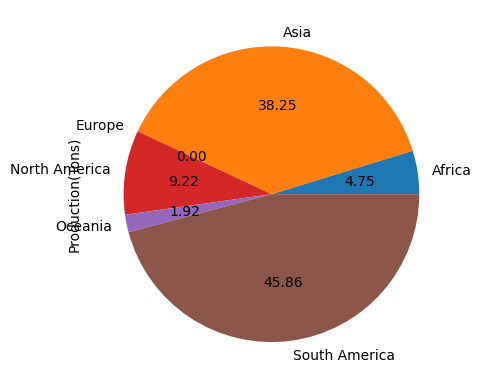

In [294]:
df_cont['Production(Tons)'].plot(kind="pie",autopct="%.2f")

In [302]:
df_cont

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),Production(Tons)_%,noc
Continent,,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,2142107.5,4.751640,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,1171871.4,38.250414,25
Europe,PortugalSpain,5823.0,536.0,71.0,131870.9,0.000309,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,1082602.4,9.218918,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,162419.1,1.916815,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,677192.7,45.861905,11
